# Les régressions linéaires avec Python

Présentation (non-exhaustive) des méthodes permettant d'implémenter une régression linéaire avec Python [Article avec toutes les méthodes et leur comparaison en temps d'exécution](https://www.freecodecamp.org/news/data-science-with-python-8-ways-to-do-linear-regression-and-measure-their-speed-b5577d75f8b/).

Les points fondamentaux de toute modélisation :
> 1. les données
> 2. le modèle
> 3. la fonction de coût
> 4. l'optimisation
> 5. l'évaluation

## Régression linéaire simple

### Le dataset

In [1]:
# Import des librairies
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import du dataset salaires ou génération des données aléatoirement avec sklearn

#dataset = np.genfromtxt('data/salaires.csv', delimiter = ',', skip_header=True)
#x = dataset[:,:-1]
#y = dataset[:,-1:]

#possibilité de générer des données aléatoirement avec sklearn
from sklearn.datasets import make_regression
x, y = make_regression(n_samples = 100, n_features = 1, noise = 10, random_state=123)
print(x.shape,y.shape)

(100, 1) (100,)


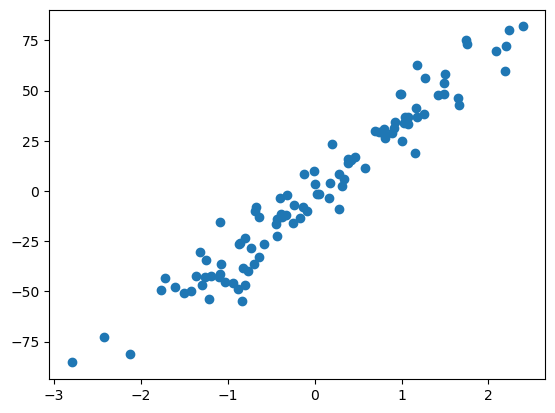

In [3]:
# Visualisation de nos données
plt.scatter(x,y);

### Avec scikit-learn

In [4]:
# Construction et entraînement du modèle
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [5]:
# Évaluation du modèle
model.score(x,y)

0.9428563369738971

In [6]:
# Récupération des coefficients
print(model.intercept_, model.coef_)

-0.08738161513838782 [33.96554737]


In [7]:
# Nouvelles prédictions
model.predict([[3], [4], [-1]])

array([101.80926051, 135.77480788, -34.05292899])

In [9]:
xx = np.linspace(-5,5,100).reshape(100,1)

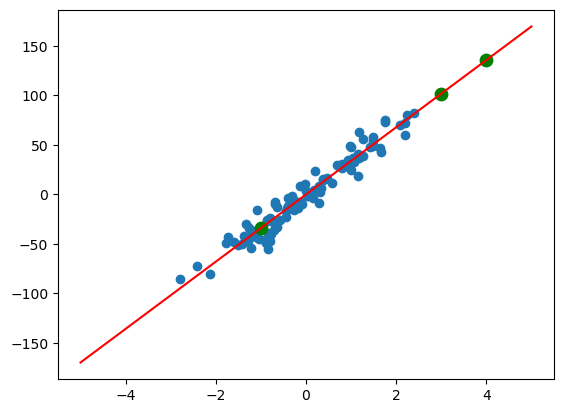

In [10]:
# Visualisation
plt.scatter(x,y)
plt.plot(xx, model.predict(xx), c='r')
plt.scatter([[3], [4], [-1]], model.predict([[3], [4], [-1]]), c='g', s=80);

### Avec statsmodel

In [11]:
# Construction le modèle
from statsmodels.api import OLS, add_constant
X = add_constant(x)
model2 = OLS(y, X)
res = model2.fit()

In [12]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     1617.
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           1.02e-62
Time:                        15:00:24   Log-Likelihood:                -366.33
No. Observations:                 100   AIC:                             736.7
Df Residuals:                      98   BIC:                             741.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0874      0.953     -0.092      0.927      -1.979       1.804
x1            33.9655      0.845     40.212      0.000      32.289      35.642
==============================================================================
Omnibus:                        0.243   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.886   Jarque-Bera (JB):                0.057
Skew:                          -0.051   Prob(JB):                        0.972
Kurtosis:                       3.055   Cond. No.                         1.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Évaluation du modèle
res.rsquared

0.9428563369738971

In [14]:
# Récupération des coefficients
res.params

array([-0.08738162, 33.96554737])

In [15]:
# Nouvelles prédictions
res.predict([[1,3],[1,4],[1,-1]])

array([101.80926051, 135.77480788, -34.05292899])

### Avec le module stats de scipy

In [16]:
# Construction du modèle
from scipy import stats
x2 = x.reshape(100,)# le modèle ne prend en imput que des array de dimension 1
model3 = stats.linregress(x2,y)

In [17]:
# Évaluation du modèle
model3.rvalue**2

0.9428563369738976

In [18]:
# Récupération des coefficients
print(model3.slope, model3.intercept)

33.96554737346917 -0.08738161513838749


In [19]:
# Nouvelles prédictions
def y_pred(x):
    return model3.slope * x + model3.intercept

y_pred(np.array([3,4,-1]))
#list(map(y_pred,[3,4,-1]))

array([101.80926051, 135.77480788, -34.05292899])

### Avec la fonction numpy polyfit

In [24]:
# Construction du modèle
x2 = x.reshape(100,)# le modèle ne prend en imput que des array de dimension 1
model4 = np.polyfit(x2,y,1)
model4

array([33.96554737, -0.08738162])

In [25]:
# Nouvelles prédictions
poly = np.poly1d(model4)
print(poly)
poly([3,4,-1])

 
33.97 x - 0.08738


array([101.80926051, 135.77480788, -34.05292899])

In [26]:
# Évaluation du modèle
def R_carre(y, y_pred):
    num = np.sum((y-y_pred)**2)
    den = np.sum((y-np.mean(y))**2)
    return 1 - num/den

R_carre(y, poly(x2))

0.9428563369738971

         3          2
-0.6791 x + 0.6576 x + 35.95 x - 0.8765


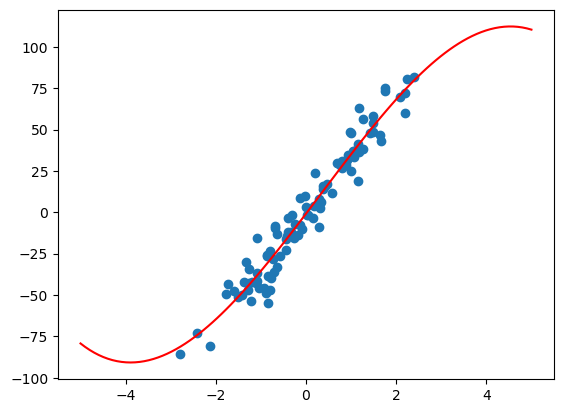

In [27]:
poly2 = np.poly1d(np.polyfit(x2,y,3))
print(poly2)

xx = np.linspace(-5,5,100).reshape(100,1)
plt.scatter(x,y)
plt.plot(xx, poly2(xx), c='r');

In [28]:
R_carre(y, poly2(x2))

0.9454280921584286